In [4]:
%who

Interactive namespace is empty.


In [2]:
! ls -l /g/data/w97/ad9701/drought_2017to2020/precip_data/

total 7683916
drwxr-sr-x. 2 ad9701 w97       4096 Apr  3 20:59 10th_percentile
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 15:47 10th_percentile_JJAS
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 11:25 10th_percentile_nonzero
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 13:23 20th_percentile
-rw-r--r--. 1 ad9701 w97    4598365 Mar 11 14:51 agcd_land_mask.nc
-rw-r--r--. 1 ad9701 w97 1434877429 Mar 10 15:37 agcd_monthly_1900_2020.nc
-rw-r--r--. 1 ad9701 w97    4589267 Mar 11 14:19 chirps_land_mask.nc
-rw-r--r--. 1 ad9701 w97  501442526 Mar 10 15:07 chirps_monthly_1981_2021.nc
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 11:35 drght_10th_perc_baseline_198101_202005
drwxr-sr-x. 2 ad9701 w97       4096 Apr  3 23:50 drght_10th_perc_baseline_198101_202005_old
drwxr-sr-x. 2 ad9701 w97       4096 Apr  4 13:46 drght_20th_perc_baseline_198101_202005
-rw-r--r--. 1 ad9701 w97    1157021 Mar 11 14:52 mswep_land_mask.nc
drwxr-sr-x. 2 ad9701 w97       4096 Mar 11 13:37 old
-rw-r--r--. 1 ad9701 w97   93331634 

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py

In [12]:
alldata_dict['mswep']

{'full_path': ['/g/data/fj4/SatellitePrecip/MSWEP_V280/Past/Monthly/',
  '/g/data/fj4/SatellitePrecip/MSWEP_V280/NRT/Monthly/'],
 'file_name': '*.nc',
 'varname': 'precipitation',
 'lat_slice': slice(-10, -44, None),
 'lon_slice': slice(112, 154, None),
 'units': 'mm month-1',
 'rename_latlon': False,
 'land_mask': False,
 'mon_file': 'precipitation_mswep_monthly_1979_2021.nc'}

### Calculating JJAS sum from multiple datasets

In [42]:
%who

add_cyclic_point	 agcd_info	 alldata_dict	 awra_info	 ccrs	 cfeature	 chirps_info	 cmap	 cticker	 
d	 da	 da_JJAS_byyear	 data_dir	 data_dir_P	 data_type	 draw_spatial_plot	 draw_spatial_plot_3panels	 ds	 
fig_dir	 figname_prefix	 get_da	 gleam_info	 glob	 levels	 mon_sel	 mswep_info	 np	 
out_dir	 pd	 plt	 regrid_all_from_list	 save_monthly_data	 sys	 thresh_dir	 time_slice	 vname	 
xe	 xr	 year_slice	 


In [8]:
alldata_dict['mswep']['mon_file']

'precipitation_mswep_monthly_1979_2021.nc'

In [44]:
data_dir_P = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/sum_JJAS/'
mon_sel = [6, 7, 8, 9]

for d in ['mswep', 'chirps', 'agcd']:
    ds = xr.open_dataset(data_dir_P + alldata_dict[d]['mon_file'])
    vname = alldata_dict[d]['varname']
    
    da = ds[vname].sel(time = ds.time.dt.month.isin(mon_sel))
    da_JJAS_byyear = da.groupby('time.year').sum()
    da_JJAS_byyear.to_netcdf(out_dir + d + '_JJAS_precip.nc')

In [54]:
data_dir_P + alldata_dict[d]['mon_file']

'/g/data/w97/ad9701/drought_2017to2020/precip_data/agcd_monthly_1900_2020.nc'

In [55]:
alldata_dict[d]['varname']

'precip'

In [45]:
alldata_dict['mswep']

{'full_path': ['/g/data/fj4/SatellitePrecip/MSWEP_V280/Past/Monthly/',
  '/g/data/fj4/SatellitePrecip/MSWEP_V280/NRT/Monthly/'],
 'file_name': '*.nc',
 'varname': 'precipitation',
 'lat_slice': slice(-10, -44, None),
 'lon_slice': slice(112, 154, None),
 'units': 'mm month-1',
 'rename_latlon': False,
 'land_mask': False,
 'mon_file': 'precipitation_mswep_monthly_1979_2021.nc'}

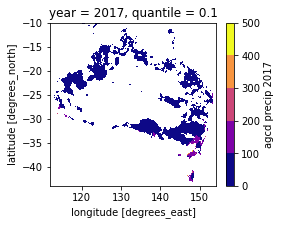

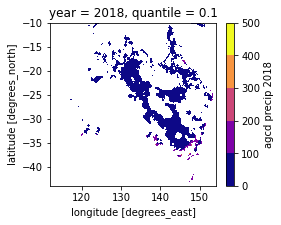

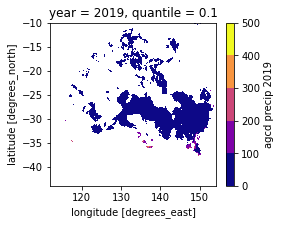

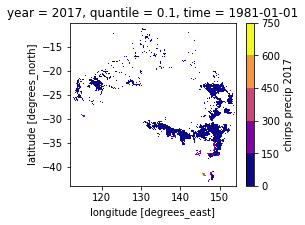

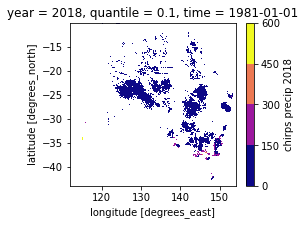

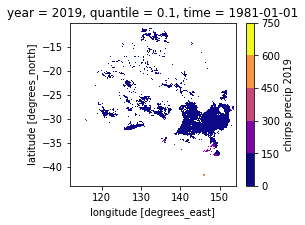

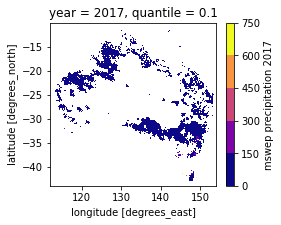

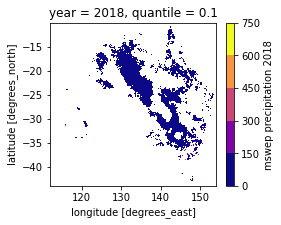

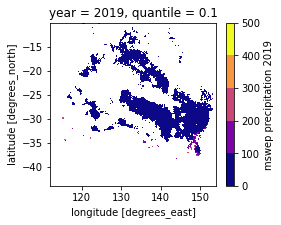

In [4]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + 'drght_10th_perc_baseline_198101_202005_JJAS/'
fig_dir = 'figures/drought_2017to2020/precip/below_10th_perc_JJAS/'
figname_prefix = 'below10p'

thresh_dir = data_dir + '10th_percentile_JJAS/'
out_dir = data_dir + 'drght_10th_perc_baseline_198101_202005_JJAS/'

time_slice = slice('2017-01-01', '2020-12-31')
year_slice = slice(2017, 2020)

cmap = 'plasma' #"YlGnBu"

levels = 6 #[0, 10, 20, 30, 40, 50]

for d in ['agcd', 'chirps', 'mswep']: #'agcd'
    ds = xr.open_dataset(data_dir + 'sum_JJAS/' + d + '_JJAS_precip.nc')
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(year = year_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_10th_perc_threshold.nc')
    da_below_thresh = da.where(da <= ds_thresh[vname])
    da_below_thresh.to_netcdf(out_dir + d + '_JJAS_precip_lt_10th_perc.nc')
    
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da_mask = ds_mask['land_mask']
    
    for year in [2017, 2018, 2019]: #, 2020]:
        da_yr = da_below_thresh.sel(year = year).load()
        da_yr = da_yr*da_mask

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size

        da_yr.rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", aspect = aspect, size = 3, cmap = cmap, levels = levels) #"RdBu_r") "YlGnBu"
        plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_' + d + '.png')
        del da_yr

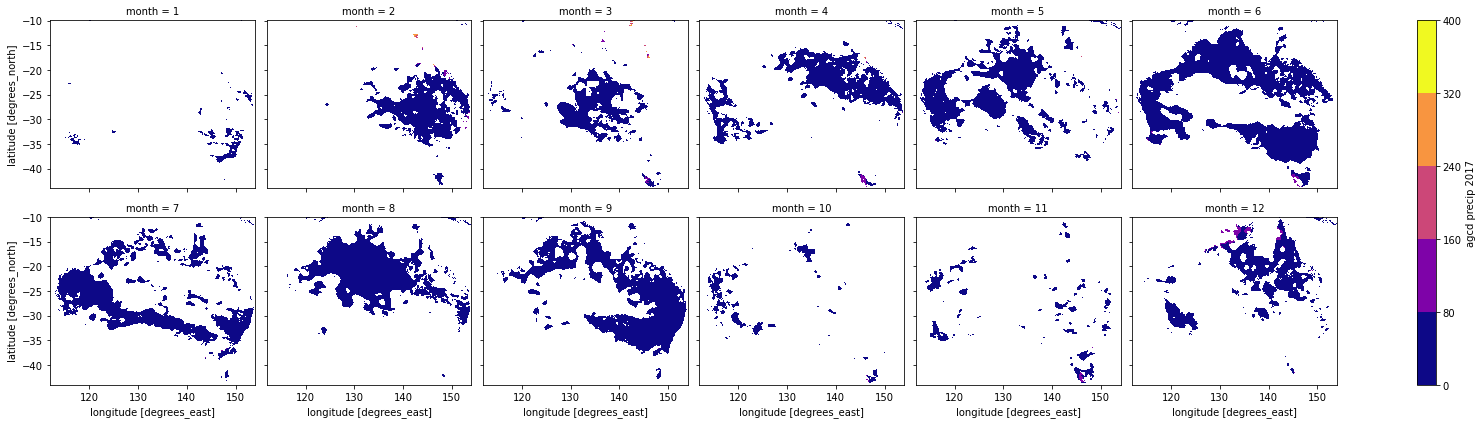

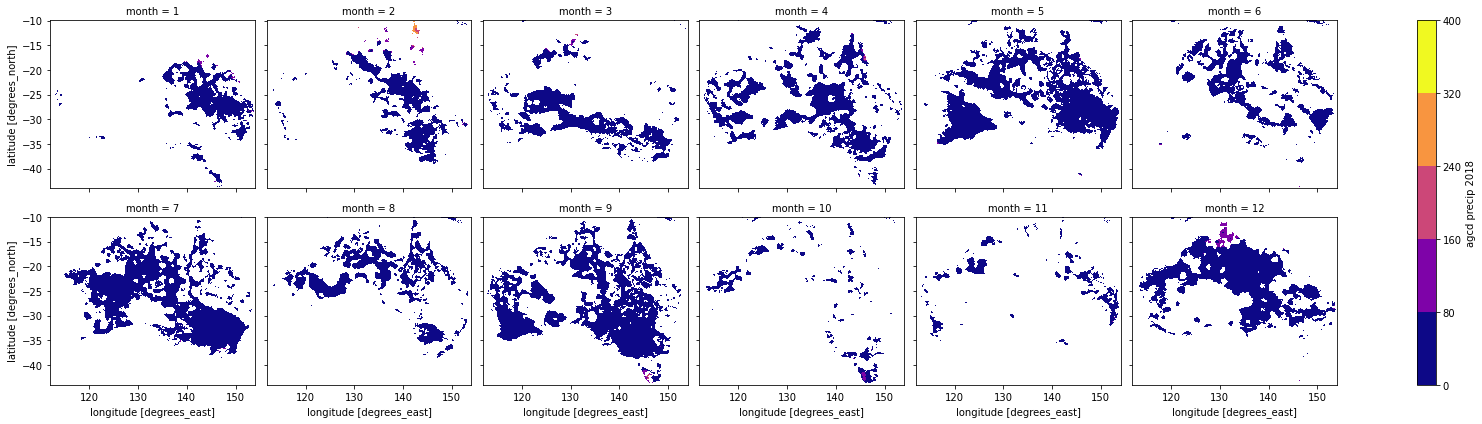

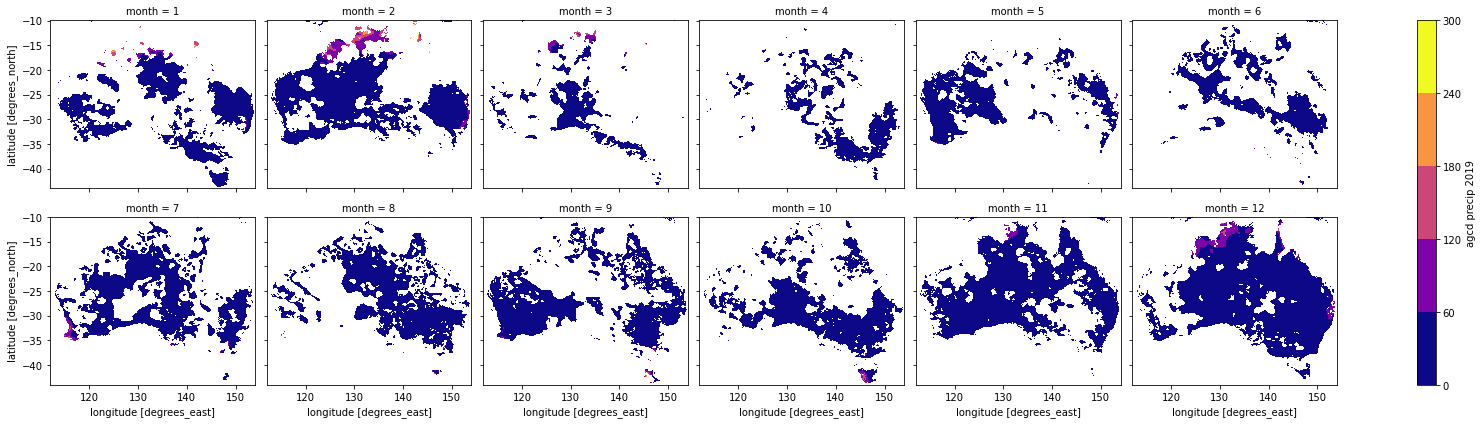

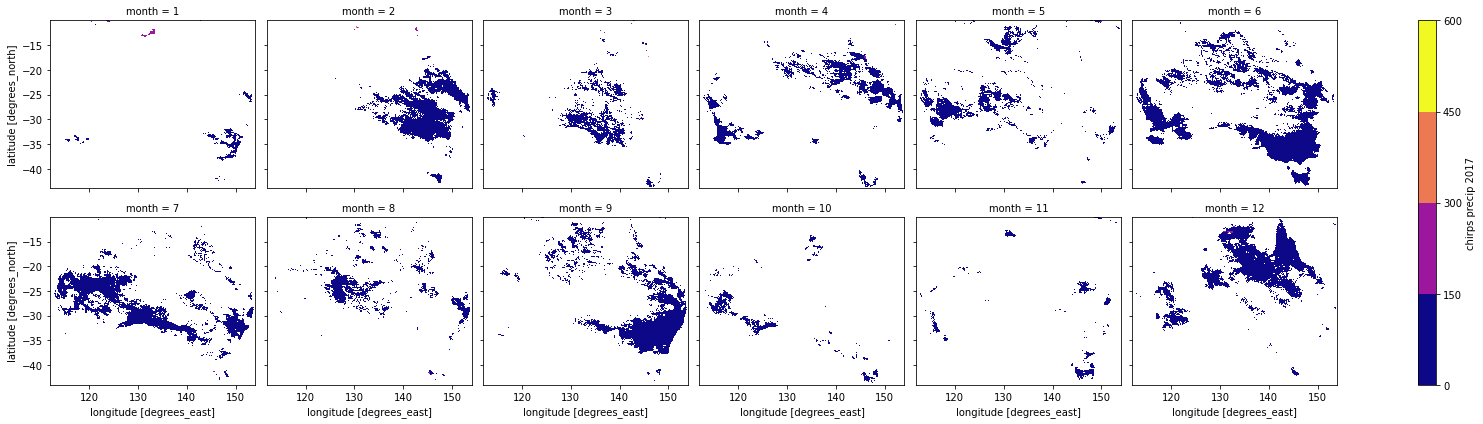

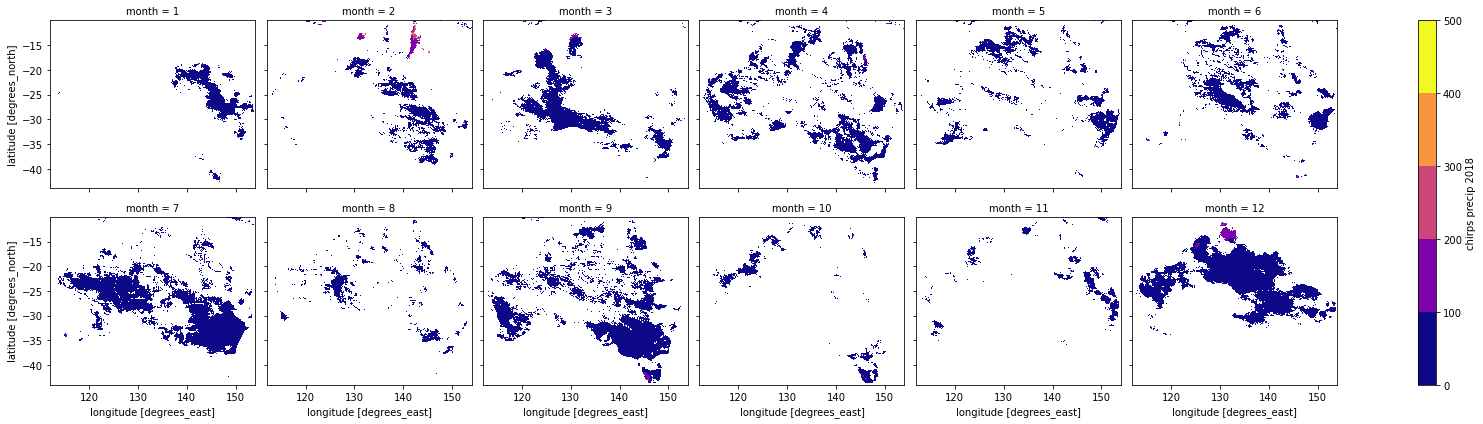

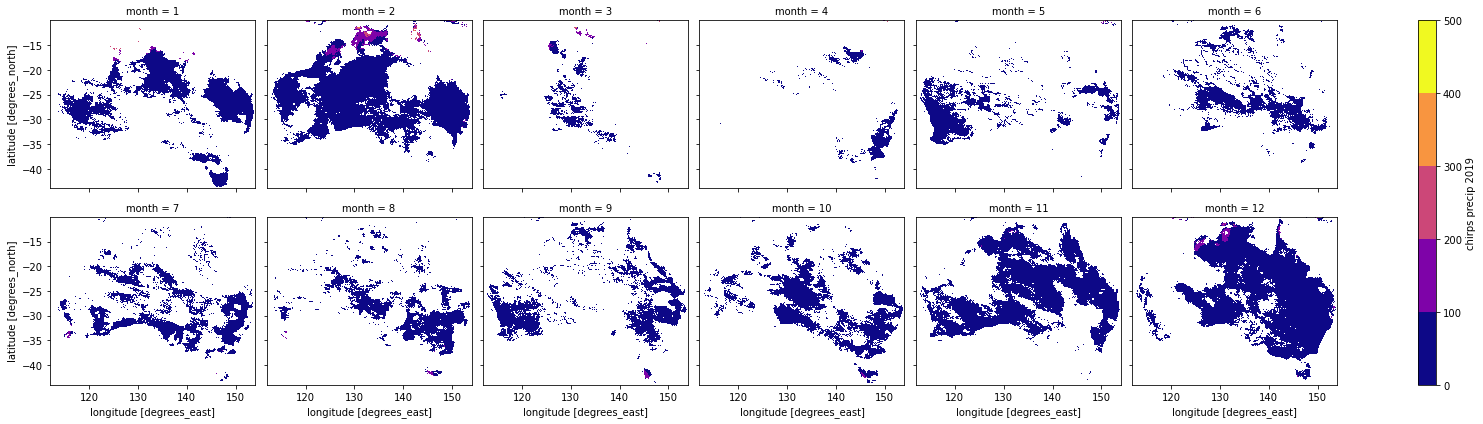

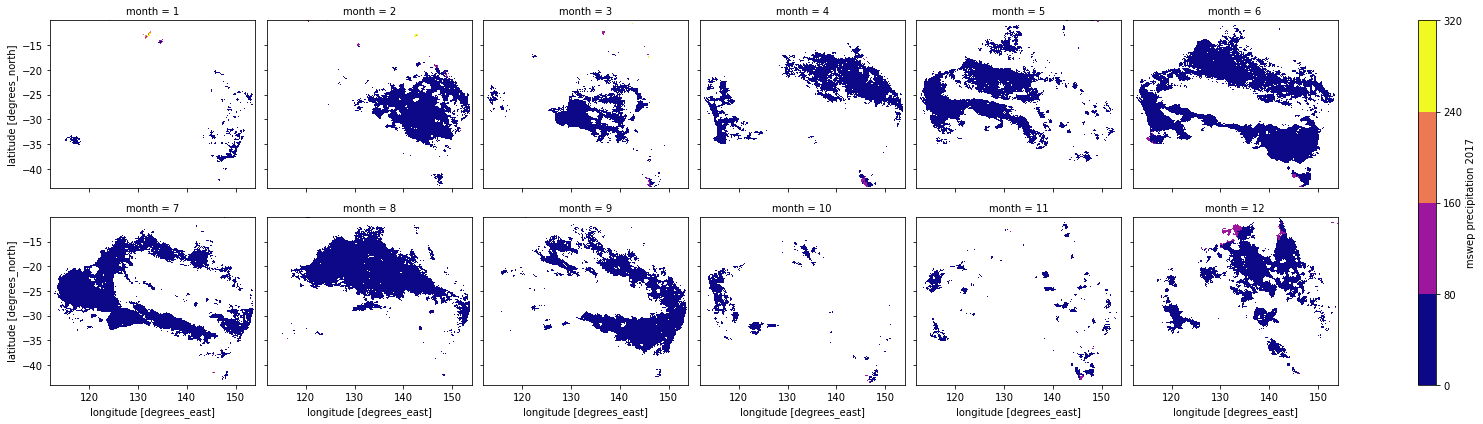

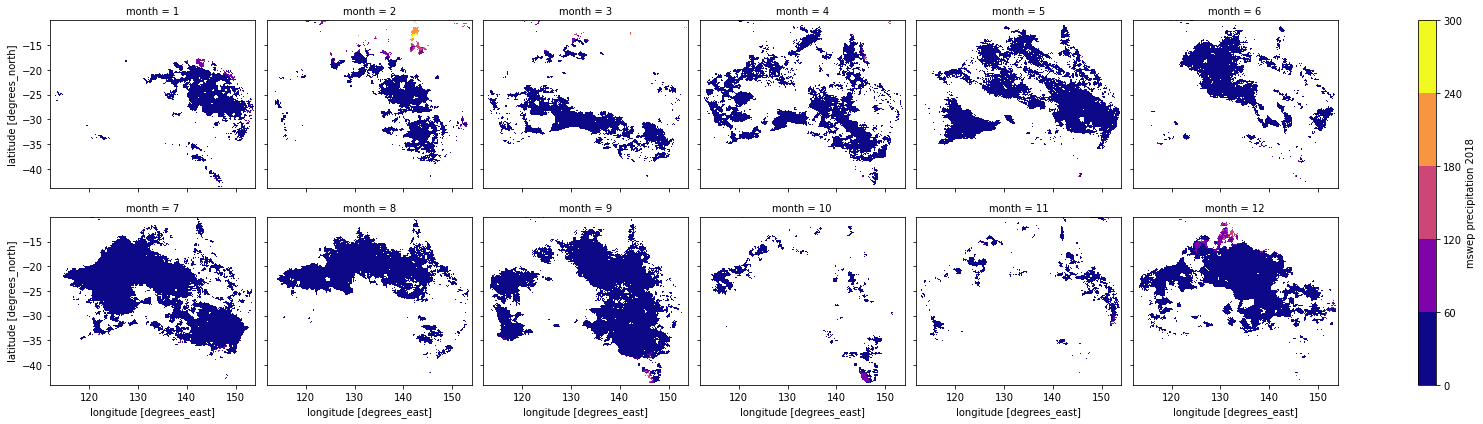

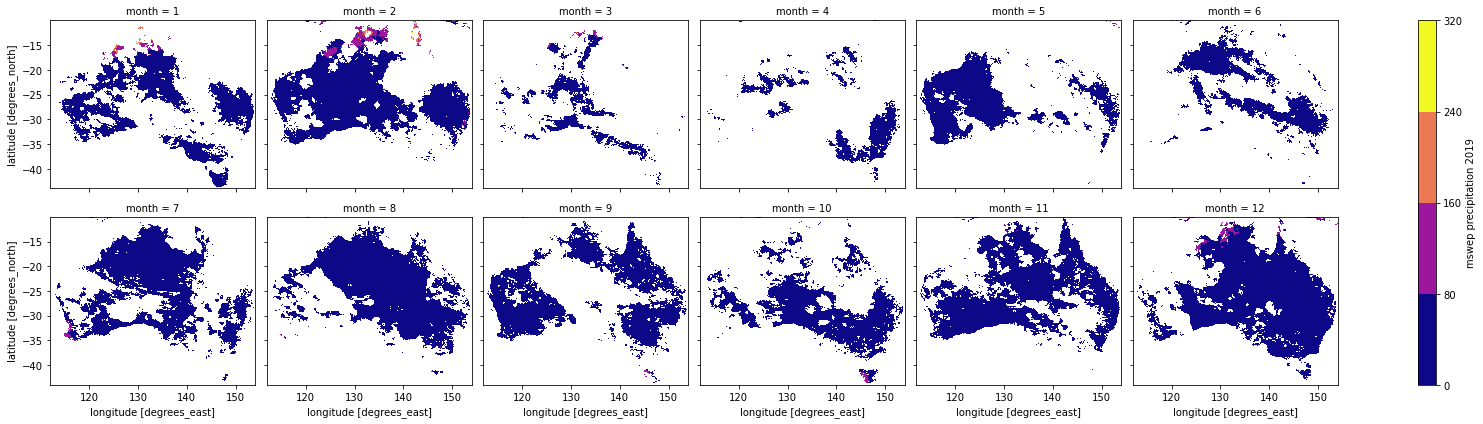

In [6]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = data_dir + 'drght_20th_perc_baseline_198101_202005/'
fig_dir = 'figures/drought_2017to2020/precip/below_20th_perc/'
figname_prefix = 'below20p'

thresh_dir = data_dir + '20th_percentile/'
out_dir = data_dir + 'drght_20th_perc_baseline_198101_202005/'

time_slice = slice('2017-01-01', '2020-12-31')

cmap = 'plasma' #"YlGnBu"

levels = 6 #[0, 10, 20, 30, 40, 50]

for d in ['agcd', 'chirps', 'mswep']: #'agcd'
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_20th_perc_threshold.nc')
    da_below_thresh = get_data_below_thresh_bymon(da, ds_thresh[vname])
    da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_20th_perc.nc')
    
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    da_mask = ds_mask['land_mask']
    
    for year in [2017, 2018, 2019]: #, 2020]:
        da_yr = da_below_thresh.sel(time = slice(str(year), str(year))).load()
        da_yr = da_yr*da_mask

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size

        da_yr.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = cmap, levels = levels) #"RdBu_r") "YlGnBu"
        plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
        del da_yr

In [8]:
%who

add_cyclic_point	 agcd_info	 alldata_dict	 aspect	 awra_info	 ccrs	 cfeature	 chirps_info	 cmap	 
cticker	 d	 da	 da_below_thresh	 da_mask	 da_sel	 da_thresh_sel	 data_dir	 data_type	 
diff_cmap	 diff_levels	 draw_spatial_plot	 draw_spatial_plot_3panels	 ds	 ds_mask	 ds_thresh	 fig_dir	 figname_prefix	 
get_da	 get_data_below_thresh_bymon	 gleam_info	 glob	 lat_size	 levels	 lon_size	 mswep_info	 np	 
out_dir	 pd	 plt	 regrid_all_from_list	 save_monthly_data	 sys	 thresh_dir	 time_slice	 vname	 
xe	 xr	 year	 


KeyError: 'precip'

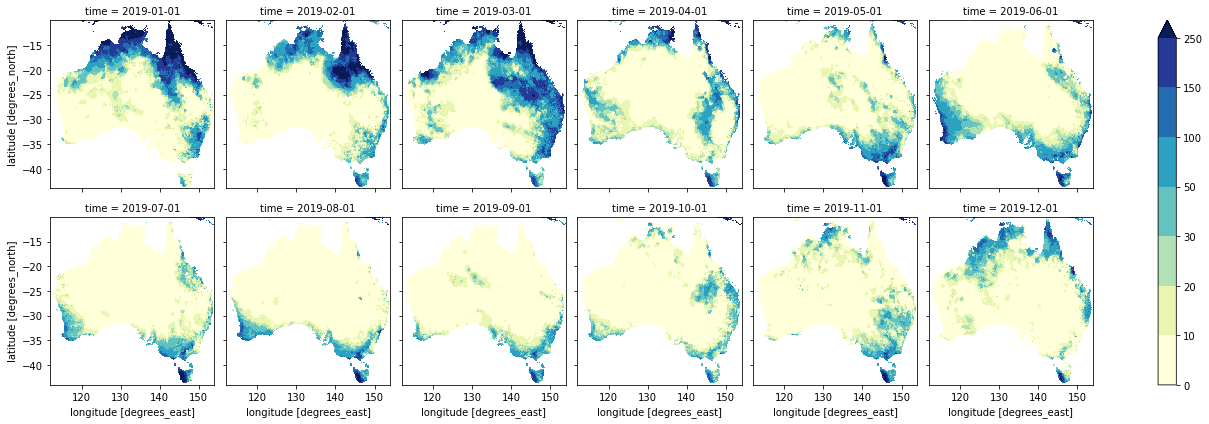

In [8]:
levels = [0, 10, 20, 30, 50, 100, 150, 250]
cmap = 'YlGnBu'

diff_levels = [-20, -10, -1, 1, 10, 20]
diff_cmap = 'RdBu'

year = 2019
da_sel=da.sel(time = slice(str(year), str(year)))
(da_sel*da_mask).plot(col="time", col_wrap = 6, levels = levels, cmap = cmap)
da_thresh_sel = ds_thresh['precip'].sel(month = da_sel['time.month'].values).rename({'month':'time'}).assign_coords({'time': da_sel['time'].values})
((da_sel - da_thresh_sel)*da_mask).plot(col="time", col_wrap = 6, cmap = diff_cmap, levels = diff_levels)

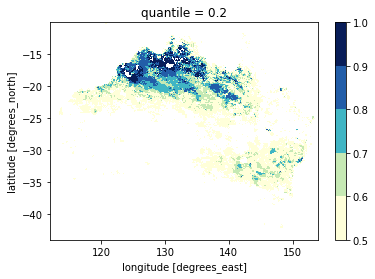

In [7]:
da_sel = da_below_thresh.sel(time = slice('2017-01-01', '2019-12-31'))
mon_sel = [6, 7, 8, 9]

da_sel = da_sel.sel(time = da_sel.time.dt.month.isin(mon_sel))
da_plot = da_sel.count('time')*da_mask/12
(da_plot.where(da_plot >= 0.5)).plot(levels = 6, cmap = 'YlGnBu')

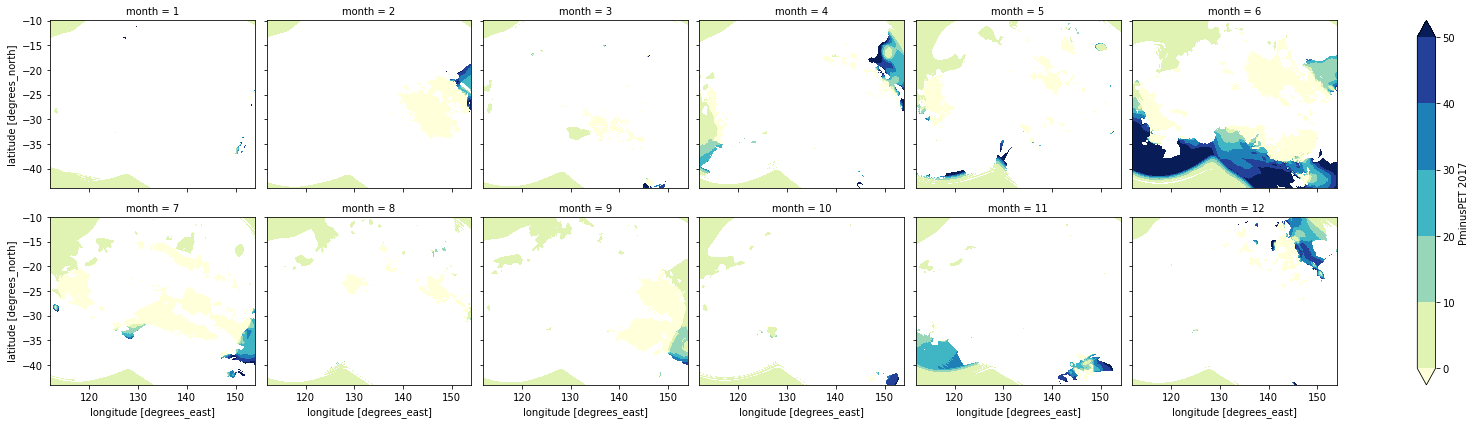

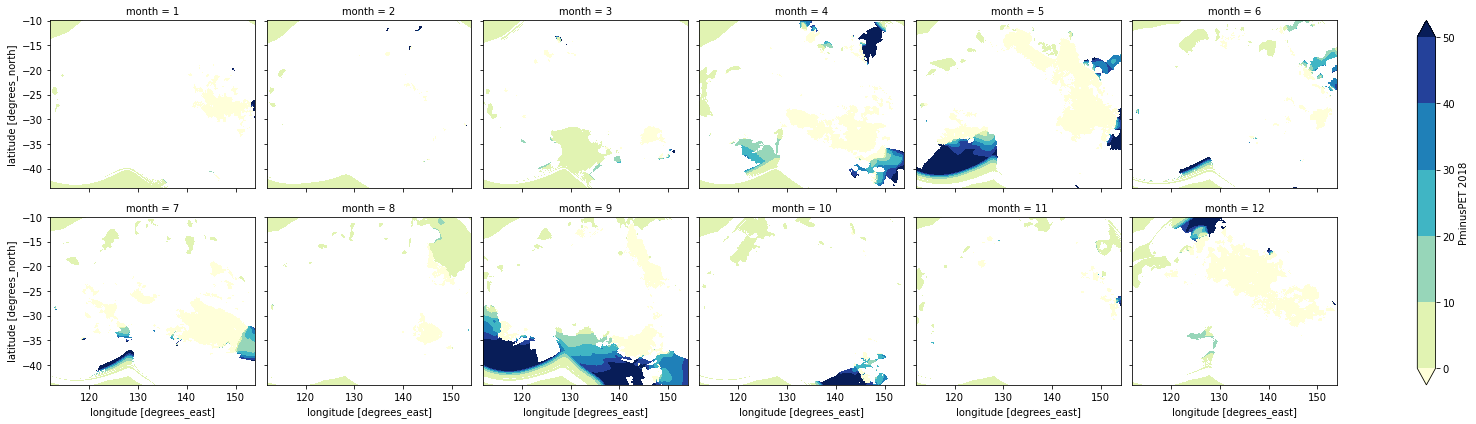

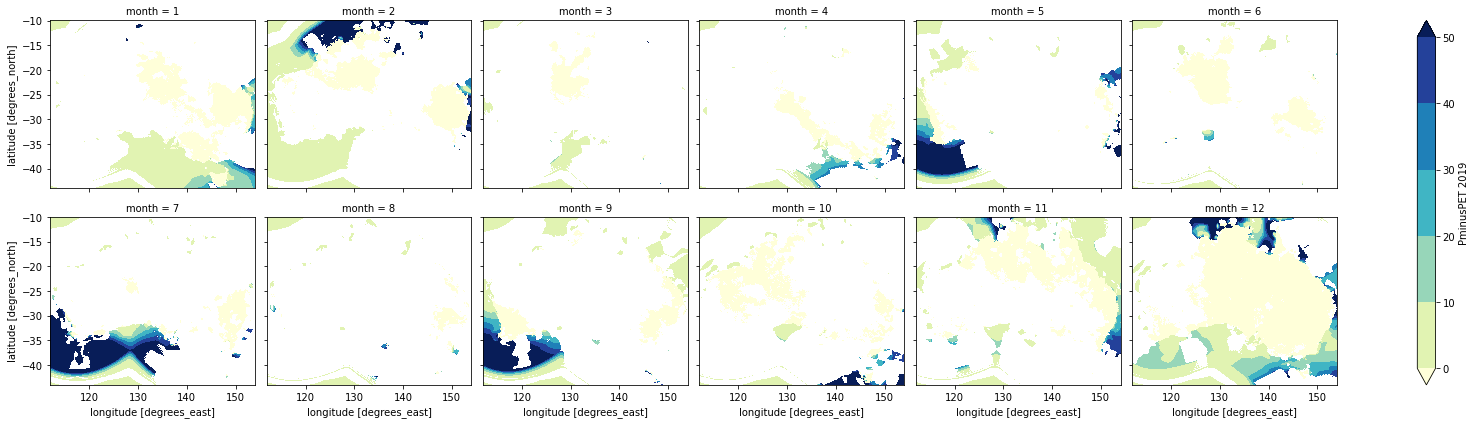

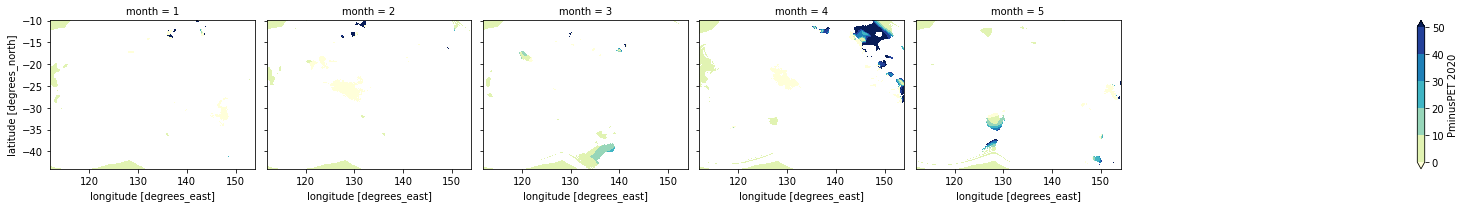

In [12]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/PminusPET/'
out_dir = data_dir + 'drght_10th_perc_baseline_198101_202005/'
fig_dir = 'figures/drought_2017to2020/PminusPET/below_10th_perc/'
figname_prefix = 'below10p'

thresh_dir = data_dir + '10th_percentile/'
out_dir = data_dir + 'drght_10th_perc_baseline_198101_202005/'

time_slice = slice('2017-01-01', '2020-12-31')

levels = [0, 10, 20, 30, 40, 50]

for d in ['awra']: #'chirps', 'agcd'
    ds = xr.open_dataset(data_dir + alldata_dict[d]['mon_file'])
    data_type = (data_dir.split('/')[-2]).split('_')[0]
    if data_type == 'precip':
        vname = alldata_dict[d]['varname']
    elif data_type == 'PminusPET':
        vname = 'PminusPET'
    da = ds[vname].sel(time = time_slice)
    
    ds_thresh = xr.open_dataset(thresh_dir + d + '_10th_perc_threshold.nc')
    da_below_thresh = get_data_below_thresh_bymon(da, ds_thresh[vname])
    da_below_thresh.to_netcdf(out_dir + alldata_dict[d]['mon_file'].split('.')[0] + '_lt_10th_perc.nc')
    
    for year in [2017, 2018, 2019, 2020]:
        da_yr = da_below_thresh.sel(time = slice(str(year), str(year))).load()

        lat_size = abs((da_yr.lat[0]-da_yr.lat[-1]).values)
        lon_size = abs((da_yr.lon[0]-da_yr.lon[-1]).values)
        aspect = lon_size/lat_size

        da_yr.groupby('time.month').mean().rename(vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = "YlGnBu", levels = levels) #"RdBu_r") "YlGnBu"
        plt.savefig(fig_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
        del da_yr